# Titanic Dataset: Análise Exploratória

Neste notebook, vamos analisar os dados do naufrágio do Titanic disponíveis no Kaggle.

## Metadados

O arquivo de dados possui as seguintes colunas:

* pclass ...... Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* survival .... Survival (0 = No; 1 = Yes)
* name ........ Name
* sex ......... Sex
* age ......... Age
* sibsp ....... Number of Siblings/Spouses Aboard
* parch ....... Number of Parents/Children Aboard
* ticket ...... Ticket Number
* fare ........ Passenger Fare
* cabin ....... Cabin
* embarked .... Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


## Análises

Responderemos as seguintes questões: 

- Quem eram os passageiros do Titanic? (Sexo, Classe, Idade, etc..)
- Em qual deck os passageiros estavam e qual a relação com a classe?
- De onde os passageiros vieram?
- Quem estava viajando sozinho e quem estava com a família?
- Quais fatores influenciaram na sobrevivência?

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv("Dados/titan_train.csv")
data.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Com o resumo dos dados, podemos observar que a base possui <b>891 passageiros</b>, onde a idade média é de aproximadamente <b>30 anos</b>. A criança mais jovem tem <b>4 meses</b> e o mais idoso tem <b>80 anos</b>.

Na coluna <b>Survived</b>, o 1 significa quem sobreviveu e o 0 quem morreu, então olhando para a média, podemos dizer que aproximadamente <b>38%</b> dos passageiros sobreviveram ao naufrágio.

Podemos observar também que estão faltando muitos dados da coluna <b>Cabin</b> e que a coluna <b>Age</b> está incompleta. As análises em cima dos dados destas colunas podem não ficar precisos.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Organização e Limpeza dos Dados



In [5]:
# Divisão da faixa etária
# 0 a 15 anos - Criança
# 16 a 59 anos - Adulto
# 60 ou mais - Idoso
var_faixaEtaria = ['Criança', 'Adulto', 'Idoso']
def FaixaEtaria(idade):
    if idade < 16: return var_faixaEtaria[0]
    elif idade < 60: return var_faixaEtaria[1]
    else: return var_faixaEtaria[2]

# Portos ordenados pela rota da viagem
# Southampton (Inglaterra)
# Cherbourg-Octeville (França) 
# Queenstown (Irlanda) 
# Destino final: Nova Iorque (Estados Unidos)
var_porto = ['Southampton','Cherbourg','Queenstown']
def Porto(sigla):
    if sigla == 'S': return var_porto[0]
    elif sigla == 'C': return var_porto[1]
    else: return var_porto[2]
    
# Inclusão da Faixa etária no Dataset
data["FaixaEtaria"] = data['Age'].apply(FaixaEtaria)

# Inclusão do nome do Porto no Dataset
data['Porto'] = data['Embarked'].apply(Porto)

# Passageiro viajava sozinho (Sim ou Não)
# Inclusão da coluna sozinho no Dataset
data['Sozinho'] = data.SibSp + data.Parch
data['Sozinho'] = data['Sozinho'].apply(lambda x: 'Não' if x > 0 else 'Sim')

# Separação do código do número da Cabine
data['Cabine'] = data['Cabin'].str[0]
var_cabine = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

## Quem eram os passageiros do Titanic?

Para responder esta questão, vamos analisar os dados do perfil dos passageiros

Verificando pelo sexo, podemos ver que a maioria dos passageiros eram homens 577 (64,8%).

Sex
female    314
male      577
Name: PassengerId, dtype: int64
              Sex
Sex              
female  35.241302
male    64.758698


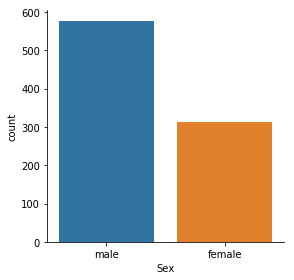

In [6]:
sns.factorplot('Sex',data=data,kind='count')
print(data.groupby('Sex').PassengerId.count())
print(data.groupby('Sex').agg({'Sex':'count'}).apply(lambda x: 100 * x / float(x.sum())))

Observamos também que a 3ª classe era a que mais havia passaegeiros.

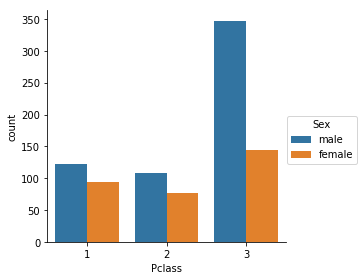

In [7]:
sns.factorplot('Pclass',data=data,hue='Sex',kind='count')

A idade da maioria dos passageiros estava em torno 18 e 40 anos.

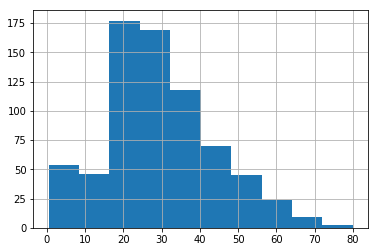

In [8]:
data['Age'].hist()

Com a distribuição pela faixa etária, podemos verificar que os passageiros eram 83 crianças (9,3%), 605 adultos (67,9%) e 203 idosos (22,7%).

Adulto     605
Idoso      203
Criança     83
Name: FaixaEtaria, dtype: int64
             FaixaEtaria
FaixaEtaria             
Adulto         67.901235
Criança         9.315376
Idoso          22.783389


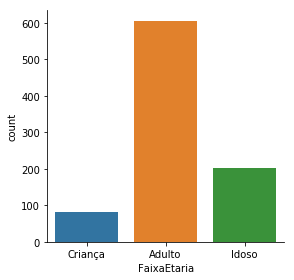

In [9]:
sns.factorplot('FaixaEtaria',data=data,kind='count',order=var_faixaEtaria)
print(data['FaixaEtaria'].value_counts())
print(data.groupby('FaixaEtaria').agg({'FaixaEtaria':'count'}).apply(lambda x: 100 * x / float(x.sum())))

Podemos observar que há muitos adultos em todas as classes, e que a maioria dos idosos estava na 3ª classe.

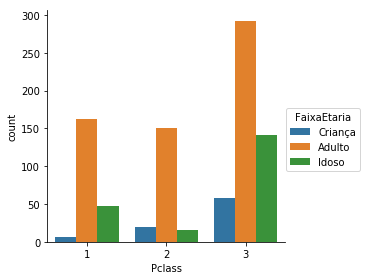

In [10]:
sns.factorplot('Pclass',data=data,hue='FaixaEtaria',kind='count',hue_order=var_faixaEtaria)

## Em qual deck os passageiros estavam e qual a relação com a classe?

Percebemos que os passageiros da 1ª classe ficaram exclusivamente nos decks A, B, C e os passageiros de 3ª classe só tiveram acesso a partir do deck E. Não podemos esquecer que os dados das cabines estavam incompletos, então a análise fica superficial.

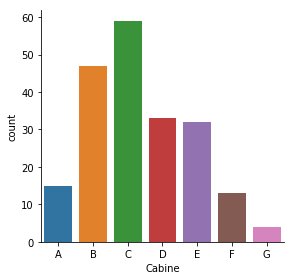

In [11]:
sns.factorplot('Cabine',data=data,kind='count',order=var_cabine)

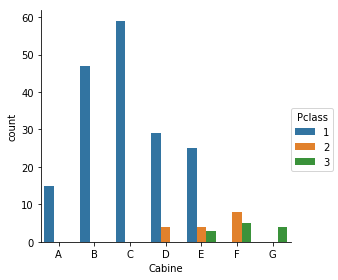

In [12]:
sns.factorplot('Cabine',data=data,hue='Pclass',kind='count',order=var_cabine)

## De onde os passageiros vieram?

O roteiro do Titanic estava planejado para partir de Southampton (Inglaterra), passar por Cherbourg-Octeville (França) e Queenstown (Irlanda) onde mais passageiros embarcaram e tendo como destino final Nova Iorque (Estados Unidos).

![title](Imagens/titanic-route.gif)

A grande maioria dos passageiros embarcaram na cidade de Southampton, ponto de partida do Titanic. Na cidade de Queenstown, embarcaram muito mais idosos do que passageiros de outras idades.

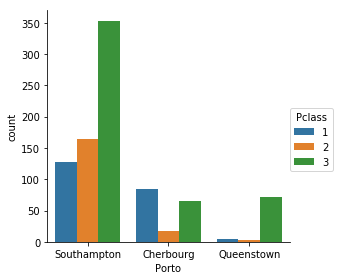

In [13]:
sns.factorplot('Porto',data=data,hue='Pclass',kind='count',row_order=var_porto)

## Sobreviventes por Classe

Sem muita surpresa, a maioria dos sobreviventes estavam na 1ª classe. Isso ocorreu pelo motivo de estarem em descks superiores e mais próximos dos botes salva vidas, além do fator dinheiro, tiveram maior privilégio em relação aos demais passageiros.

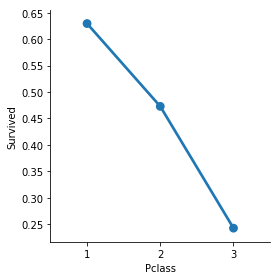

In [14]:
sns.factorplot('Pclass','Survived',data=data,ci=None)

## Sobreviventes por Sexo

Os homens deram prioridade para as mulheres entrarem nos botes salva vidas, assim houve uma taxa elevada de sobrevivência principalmente nas 1ª e 2ª classes.

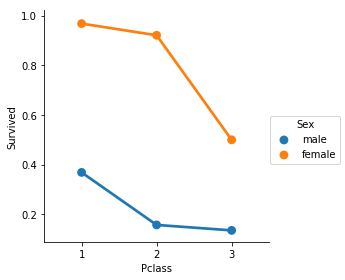

In [15]:
sns.factorplot('Pclass','Survived',data=data,hue='Sex',ci=None)

## Sobreviventes por Idade

A idade não foi um fator cricial para o passageiro ter sobrevivo ou não, mas podemos ver que os jovens tiveram um pequena vantagem em relação aos de mais idade.

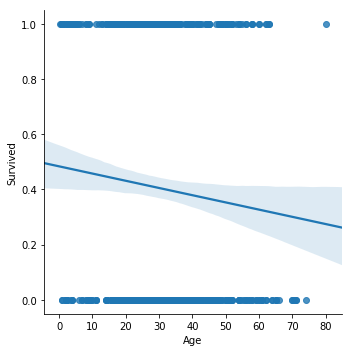

In [16]:
sns.lmplot('Age','Survived',data=data)

## Sobreviventes por Faixa Etária

Podemos ver que a foram priorizadas as crianças (meninos e meninas) e mulheres de todas as idades para embarcarem nos botes salva vidas.

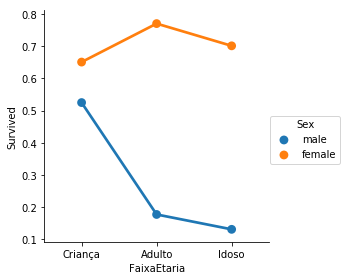

In [17]:
sns.factorplot('FaixaEtaria','Survived',data=data,hue='Sex',ci=None,order=var_faixaEtaria)

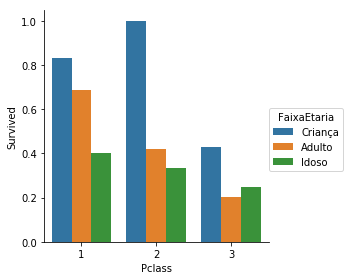

In [18]:
sns.factorplot('Pclass','Survived',data=data,hue='FaixaEtaria',kind='bar',ci=None,hue_order=var_faixaEtaria)

## Sobreviventes com parentes abordo

Passageiros que estavam com suas famílias (esposo(a), filhos, irmãos, pai, mãe) ajudaram seu familiares e conseguiram sobreviver. 537 pessoas estavam sozinhas e 354 com suas famílias.

Sim    537
Não    354
Name: Sozinho, dtype: int64


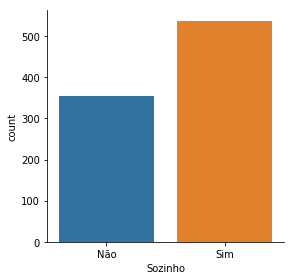

In [19]:
sns.factorplot('Sozinho',data=data,kind='count')
print(data['Sozinho'].value_counts())

O percentual de sobrevivência das pessoas com familiares abordo foi de apriximadamente 51%, e quem estava sozinho, somente 31%.

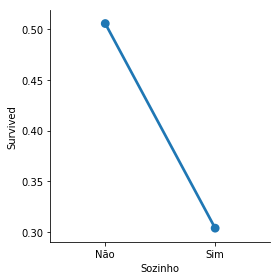

In [20]:
sns.factorplot('Sozinho','Survived',data=data,ci=None)

Estavam abordo um grupo grande de familiares com sobrenome Andersson e Sage.

In [21]:
data['Surname'] = data['Name'].str.split(',',expand=True)[0]
data.groupby('Surname').PassengerId.count().sort_values(ascending=False).head()

Surname
Andersson    9
Sage         7
Skoog        6
Johnson      6
Panula       6
Name: PassengerId, dtype: int64

## Conclusão

Com os números mostrados, podemos verficar que as pessoas que estavam com suas famílias estavam focadas em ajudar uns aos outros, provavelmente por haverem muitas mães com crianças.
Também podemos perceber que a grande maioria dos sobreviventes foram as mulheres e crianças (meninos e meninas). O fator dinheiro e proximidade com os botes salva vidas também contou bastante.